In [1]:
import matplotlib.pyplot as plt
'exec %matplotlib inline'
import numpy as np
import inspect

from qiskit import IBMQ, BasicAer, Aer, transpile
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.circuit.library import MCMT
from qiskit.providers.ibmq.managed import IBMQJobManager

from qiskit.tools.visualization import plot_histogram, plot_gate_map, plot_circuit_layout
from qiskit.tools.monitor import job_monitor

In [76]:
def create_circuit(n,s):
    qubits = []
    for i in range(n): #this is for mcz-gate
        qubits.append(i)
    multiz = MCMT('z', num_ctrl_qubits=n-1, num_target_qubits=1)
    mcz = multiz.to_gate()
    
    q = QuantumRegister(n, name='q')
    c = ClassicalRegister(n, name='c')
    qc = QuantumCircuit(q,c)
    
    #Tästä puuttuu osa algoritmista!
    for i in range(n):
        qc.h(i)
    qc.barrier()
    
    for i in range(n):
        if (s[i] == '0'):
            qc.x(i)
    qc.append(mcz, qubits)
    for i in range(n):
        if (s[i] == '0'):
            qc.x(i)
    qc.barrier()
    
    for i in range(n):
        qc.h(i)
    for i in range(n):
        qc.x(i)
    qc.append(mcz, qubits)
    for i in range(n):
        qc.x(i)
        
    for i in range(n):
        qc.h(i)
        
    qc.barrier()
    for i in range(n):
        qc.measure(i,i)
    return qc

In [77]:
circs = []
s = '110'
n = len(s)
circs.append(create_circuit(n,s))

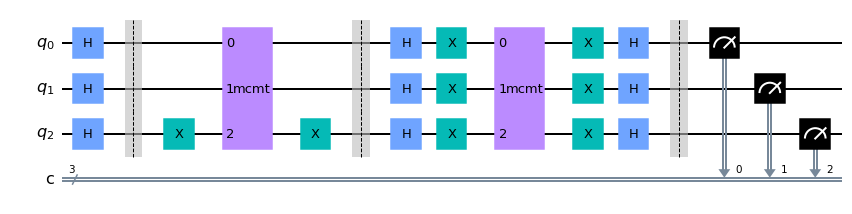

In [78]:
circs[0].draw()

In [48]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

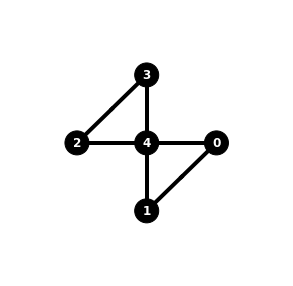

In [83]:
# Use the transpiler for the circuit 
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_5_yorktown')
name = 'Grover\'s search algorithm ' + str(n) + ' qubits'

inspect.signature(transpile)
circs = transpile(circs, backend=backend, optimization_level=3)
plot_circuit_layout(circs[0], backend)

In [84]:
# Run on a IBM machine
shots = 8192

job_manager = IBMQJobManager()
jobs = job_manager.run(circs, backend=backend, name=name, shots=shots)

In [88]:
jobs.statuses()

[<JobStatus.QUEUED: 'job is queued'>]

In [80]:
backend = Aer.get_backend('qasm_simulator')
simulations = execute(circs, backend=backend, shots=8192).result()


In [89]:
# Store all results
exp_results = jobs.results()

exp_result = exp_results.get_counts(0)
#second_name_here = exp_results.get_counts(1)

sim_counts = simulations.get_counts(0)
#second name here = simulations.result().get_counts(1)

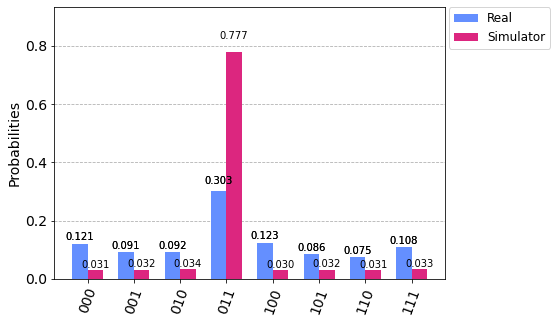

In [90]:
# Yorktown
legend = ['Real', 'Simulator']
plot_histogram([exp_result, sim_counts], legend=legend)

In [75]:
import qiskit
for i in qiskit.__qiskit_version__.items():
    print(i)

('qiskit-terra', '0.17.1')
('qiskit-aer', '0.8.1')
('qiskit-ignis', '0.6.0')
('qiskit-ibmq-provider', '0.12.3')
('qiskit-aqua', '0.9.1')
('qiskit', '0.25.2')
('qiskit-nature', None)
('qiskit-finance', None)
('qiskit-optimization', None)
('qiskit-machine-learning', None)
